## Part 1: Fundamentals

### Fundamental terms in portfolio optimization 
- (notes from https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#optimal-risky-portfolio)

There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. Don’t worry, I will simplify it and make it easy and clear.

We will go through each one through an example.

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

Step 1: Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# input 1: Tickers

In [2]:
# Create a list of tickers
tickers = [
'TSLA',
'AAPL',
'MSFT',
'ARKK',
'AMZN',
'GOOG',
'NFLX', 
'NVDA',
'FB',
'SPY',
'IWM',
'BABA',
'V',
'VOO',
'ARKQ',
'ETH-USD', 
'BTC-USD', 
'MIDAS-USD', 
'DOGE-USD', 
'AVAX-USD', 
'DOT-USD',
'ADA-USD',
'XRP-USD',
'UNI-USD',
'LINK-USD',
'AAVE-USD',
'BNB-USD',
'PYR-USD', 
'MATIC-USD']

### Input start and end date variables and assign dates 
startDate='2015/01/01'
endDate='2022/10/31'

### Input available capital to invest 
capital = 10000

### Input the number of assets to keep 
numOfAssets = 13
 


In [3]:
# TODO 
# 1. Create a new for loop to iterate through the number of assets to keep and determine the optimal number of assets to keep
# 2. Create streamlit application for to display the results 
# 3. Make streamlit application interactive so that one can choose the inputs and see the results

### Building an optimal risky portfolio

You will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

Let’s get started by pulling the required asset data from Yahoo.

# input 2: Start and end dates

In [4]:
### Import data ###
df = data.DataReader(tickers, 'yahoo', start=startDate, end=endDate)
df.head()

Attributes  Adj Close                                                       \
Symbols          TSLA       AAPL       MSFT       ARKK     AMZN       GOOG   
Date                                                                         
2015-01-01        NaN        NaN        NaN        NaN      NaN        NaN   
2015-01-02  14.620667  24.603205  40.926437  18.353800  15.4260  26.168653   
2015-01-03        NaN        NaN        NaN        NaN      NaN        NaN   
2015-01-04        NaN        NaN        NaN        NaN      NaN        NaN   
2015-01-05  14.006000  23.910091  40.550087  17.911564  15.1095  25.623152   

Attributes                                       ...   Volume                  \
Symbols          NFLX      NVDA  FB         SPY  ... AVAX-USD DOT-USD ADA-USD   
Date                                             ...                            
2015-01-01        NaN       NaN NaN         NaN  ...      NaN     NaN     NaN   
2015-01-02  49.848572  4.836186 NaN  178.278534  ...      NaN     NaN     NaN   
2015-01-03        NaN       NaN NaN         NaN  ...      NaN     NaN     NaN   
2015-01-04        NaN       NaN NaN         NaN  ...      NaN     NaN     NaN   
2015-01-05  47.311428  4.754502 NaN  175.058899  ...      NaN     NaN     NaN   

Attributes                                                              
Symbols    XRP-USD UNI-USD LINK-USD AAVE-USD BNB-USD PYR-USD MATIC-USD  
Date                                                                    
2015-01-01     NaN     NaN      NaN      NaN     NaN     NaN       NaN  
2015-01-02     NaN     NaN      NaN      NaN     NaN     NaN       NaN  
2015-01-03     NaN     NaN      NaN      NaN     NaN     NaN       NaN  
2015-01-04     NaN     NaN      NaN      NaN     NaN     NaN       NaN  
2015-01-05     NaN     NaN      NaN      NaN     NaN     NaN       NaN  

[5 rows x 174 columns]

In [5]:
### Send full df to csv to look at ###
df.to_csv('fulldf.csv')

In [6]:
# Closing price
df = df['Adj Close']
df.head()


Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,FB,SPY,...,AVAX-USD,DOT-USD,ADA-USD,XRP-USD,UNI-USD,LINK-USD,AAVE-USD,BNB-USD,PYR-USD,MATIC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,14.620667,24.603205,40.926437,18.353800,15.4260,26.168653,49.848572,4.836186,NaN,178.278534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,14.006000,23.910091,40.550087,17.911564,15.1095,25.623152,47.311428,4.754502,NaN,175.058899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Covariance and Correlation matrix
The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into .cov() and .corr() functions.

In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [7]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,FB,SPY,...,AVAX-USD,DOT-USD,ADA-USD,XRP-USD,UNI-USD,LINK-USD,AAVE-USD,BNB-USD,PYR-USD,MATIC-USD
Symbols,,,,,,,,,,,,,,,,,,,,,
TSLA,0.000863,0.000198,0.000185,0.000349,0.000203,0.000167,0.000248,0.000313,0.000452,0.000135,...,0.000570,0.000560,0.000294,0.000257,0.000288,0.000391,0.000529,0.000264,0.000662,0.000570
AAPL,0.000198,0.000242,0.000160,0.000180,0.000154,0.000144,0.000156,0.000225,0.000336,0.000115,...,0.000253,0.000274,0.000207,0.000166,0.000058,0.000225,0.000272,0.000187,0.000323,0.000286
MSFT,0.000185,0.000160,0.000213,0.000177,0.000165,0.000160,0.000164,0.000229,0.000351,0.000115,...,0.000244,0.000278,0.000221,0.000174,-0.000221,0.000240,0.000270,0.000191,0.000355,0.000330
ARKK,0.000349,0.000180,0.000177,0.000380,0.000196,0.000169,0.000249,0.000315,0.000680,0.000133,...,0.000599,0.000563,0.000343,0.000282,0.000127,0.000380,0.000623,0.000310,0.000763,0.000552
AMZN,0.000203,0.000154,0.000165,0.000196,0.000293,0.000165,0.000221,0.000227,0.000503,0.000104,...,0.000309,0.000348,0.000218,0.000143,0.000059,0.000225,0.000322,0.000181,0.000383,0.000303
GOOG,0.000167,0.000144,0.000160,0.000169,0.000165,0.000214,0.000168,0.000208,0.000421,0.000106,...,0.000235,0.000288,0.000206,0.000142,-0.000207,0.000205,0.000276,0.000163,0.000329,0.000275
NFLX,0.000248,0.000156,0.000164,0.000249,0.000221,0.000168,0.000586,0.000258,0.000670,0.000110,...,0.000400,0.000399,0.000263,0.000203,0.000714,0.000256,0.000356,0.000223,0.000535,0.000353
NVDA,0.000313,0.000225,0.000229,0.000315,0.000227,0.000208,0.000258,0.000617,0.000616,0.000157,...,0.000546,0.000542,0.000351,0.000269,0.000036,0.000370,0.000522,0.000316,0.000696,0.000501
FB,0.000452,0.000336,0.000351,0.000680,0.000503,0.000421,0.000670,0.000616,0.001173,0.000257,...,0.000519,0.000496,0.000493,0.000303,0.000195,0.000414,0.000561,0.000339,0.000619,0.000488


The covariance between two stocks is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [8]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,FB,SPY,...,AVAX-USD,DOT-USD,ADA-USD,XRP-USD,UNI-USD,LINK-USD,AAVE-USD,BNB-USD,PYR-USD,MATIC-USD
Symbols,,,,,,,,,,,,,,,,,,,,,
TSLA,1.000000,0.432697,0.431771,0.609201,0.402465,0.388653,0.348467,0.429374,0.388468,0.472938,...,0.230921,0.249620,0.128693,0.119557,0.017113,0.163407,0.093876,0.133132,0.229611,0.189251
AAPL,0.432697,1.000000,0.706370,0.594575,0.577776,0.632882,0.415619,0.581798,0.553408,0.758942,...,0.202222,0.242610,0.177099,0.150773,0.006754,0.183902,0.094084,0.184538,0.218196,0.185850
MSFT,0.431771,0.706370,1.000000,0.619715,0.660410,0.751424,0.464130,0.629453,0.586260,0.811402,...,0.219589,0.274307,0.204150,0.170851,-0.027618,0.211410,0.101288,0.202615,0.244869,0.230868
ARKK,0.609201,0.594575,0.619715,1.000000,0.587014,0.592448,0.527572,0.649159,0.580487,0.702870,...,0.300921,0.303607,0.219586,0.191725,0.010312,0.231663,0.123987,0.227745,0.274342,0.254327
AMZN,0.402465,0.577776,0.660410,0.587014,1.000000,0.659503,0.532232,0.533632,0.592333,0.623287,...,0.211946,0.259179,0.176032,0.122472,0.006571,0.172895,0.089563,0.167718,0.189288,0.191581
GOOG,0.388653,0.632882,0.751424,0.592448,0.659503,1.000000,0.473670,0.571651,0.650104,0.748793,...,0.197975,0.261991,0.189617,0.138139,-0.026370,0.179761,0.093902,0.172098,0.208602,0.190787
NFLX,0.348467,0.415619,0.464130,0.527572,0.532232,0.473670,1.000000,0.428945,0.514230,0.468619,...,0.188816,0.201815,0.152781,0.125470,0.056909,0.142093,0.066992,0.148920,0.177779,0.157339
NVDA,0.429374,0.581798,0.629453,0.649159,0.533632,0.571651,0.428945,1.000000,0.552427,0.651503,...,0.272979,0.291212,0.192435,0.156930,0.002830,0.193524,0.105020,0.199286,0.253111,0.216005
FB,0.388468,0.553408,0.586260,0.580487,0.592333,0.650104,0.514230,0.552427,1.000000,0.617782,...,0.245869,0.285146,0.292132,0.207015,0.008675,0.231474,0.257025,0.267588,0.229848,0.238525


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

## Part 2

###  Portfolio Variance
The formula for calculating portfolio variance differs from the usual formula of variance.

$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

wi and wj denote weights of all assets from 1 to n and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all assets. Remember that sum of weights should always be 1.

###  Portfolio expected returns
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [9]:
### Yearly returns for individual companies ###
ind_er = df.resample('Y').last().pct_change().mean() # resapmle tells pandas to group by year .last() gets the last value of the year .pct_change() gets the percentage change .mean() gets the mean of the percentage change
### Only keeping the number of assets with the highest returns. you can choose whatever you want here###
ind_er = ind_er.nlargest(numOfAssets)
ind_er


Symbols
MATIC-USD    47.313462
AVAX-USD     16.509550
DOGE-USD      7.137211
MIDAS-USD     5.247758
BNB-USD       2.997696
BTC-USD       2.597767
LINK-USD      2.019003
UNI-USD       2.003661
ADA-USD       1.781798
ETH-USD       1.452165
TSLA          1.178731
NVDA          0.783965
AAVE-USD      0.622625
dtype: float64

In [10]:
### Update the tickers variable with the assets minus the least profitable ones ###
tickers=ind_er.index.array
tickers


<PandasArray>
['MATIC-USD',  'AVAX-USD',  'DOGE-USD', 'MIDAS-USD',   'BNB-USD',   'BTC-USD',
  'LINK-USD',   'UNI-USD',   'ADA-USD',   'ETH-USD',      'TSLA',      'NVDA',
  'AAVE-USD']
Length: 13, dtype: object

In [11]:
### Update the df with only the assets we are keeping ###

df=df[tickers]


In [12]:
### Update cov_matrix with new df subtracting the undesirable columns (this step should not be necessary if written properly) ###
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()


In [13]:
### Dynamic list of weights based on the number of assets in the ind_er dataframe ###

w = []
w_num = 1/ind_er.count()
for i in range(0, ind_er.count()): 
    w.append(w_num)
print(w)


[0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693]


In [14]:
# Portfolio returns
port_er = (w*ind_er).sum()
port_er

7.04964567875373

Plotting the efficient frontier
This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [15]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))


In [16]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']



### Plot the graph of efficient frontier. A loop is necessary. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

### We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [17]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [18]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) # numpy.random.random is saying to generate a random number between 0 and 1 for each asset (number of assets is defined by num_assets)
    weights = weights/np.sum(weights) # This is saying to divide each random number by the sum of all random numbers. This is to ensure that the sum of all weights is equal to 1.
    p_weights.append(weights) # Append the weights to the p_weights array
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns) # Append returns to p_ret array
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [19]:
data = {'Returns':p_ret, 'Volatility':p_vol} # Creating a dictionary for the two array we have created. 'Returns' and 'Volatility' are the keys and p_ret and p_vol are the values.

for counter, symbol in enumerate(df.columns.tolist()): # This is saying to create a new column for each asset in the df and to assign the weight of each asset to the corresponding column. enumerate is saying to create a counter that starts at 0 and to add 1 to the counter for each asset in the df.
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights] 

In [20]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MATIC-USD weight,AVAX-USD weight,DOGE-USD weight,MIDAS-USD weight,BNB-USD weight,BTC-USD weight,LINK-USD weight,UNI-USD weight,ADA-USD weight,ETH-USD weight,TSLA weight,NVDA weight,AAVE-USD weight
0,6.976467,1.200968,0.055118,0.109211,0.096982,0.126913,0.069950,0.144884,0.023029,0.139682,0.055785,0.049354,0.067343,0.037716,0.024032
1,5.602831,0.939073,0.044296,0.071301,0.114013,0.053340,0.091566,0.097824,0.054668,0.082066,0.102815,0.048677,0.021863,0.109762,0.107808
2,3.488237,1.389696,0.000316,0.058502,0.151263,0.016802,0.049713,0.100896,0.153152,0.152074,0.058822,0.016574,0.061008,0.007625,0.173253
3,9.477354,1.125050,0.110449,0.116987,0.110704,0.111752,0.030146,0.065879,0.081950,0.125261,0.032529,0.045320,0.033969,0.110562,0.024493
4,3.672663,0.957641,0.018799,0.023495,0.054477,0.126742,0.063503,0.037277,0.099859,0.100003,0.142854,0.130649,0.132829,0.050057,0.019456


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

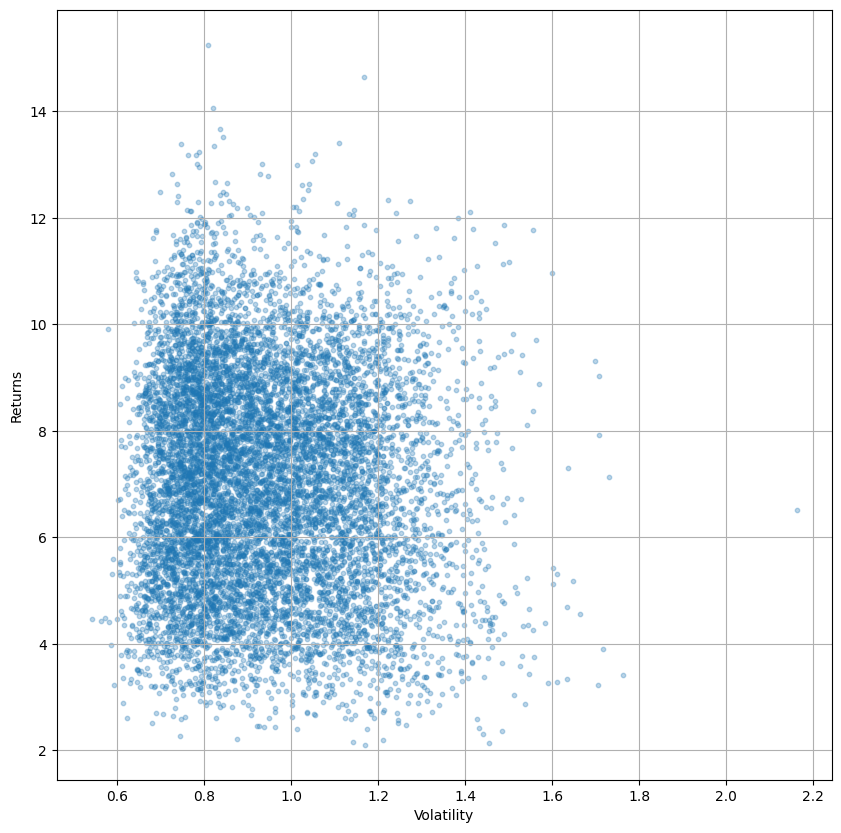

In [21]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### How to read the Efficient Frontier?
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)

And everything in between.

In [22]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns             4.475269
Volatility          0.541745
MATIC-USD weight    0.034460
AVAX-USD weight     0.050074
DOGE-USD weight     0.070931
MIDAS-USD weight    0.054464
BNB-USD weight      0.057552
BTC-USD weight      0.140089
LINK-USD weight     0.046821
UNI-USD weight      0.012174
ADA-USD weight      0.001047
ETH-USD weight      0.128309
TSLA weight         0.183895
NVDA weight         0.177621
AAVE-USD weight     0.042562
Name: 2158, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

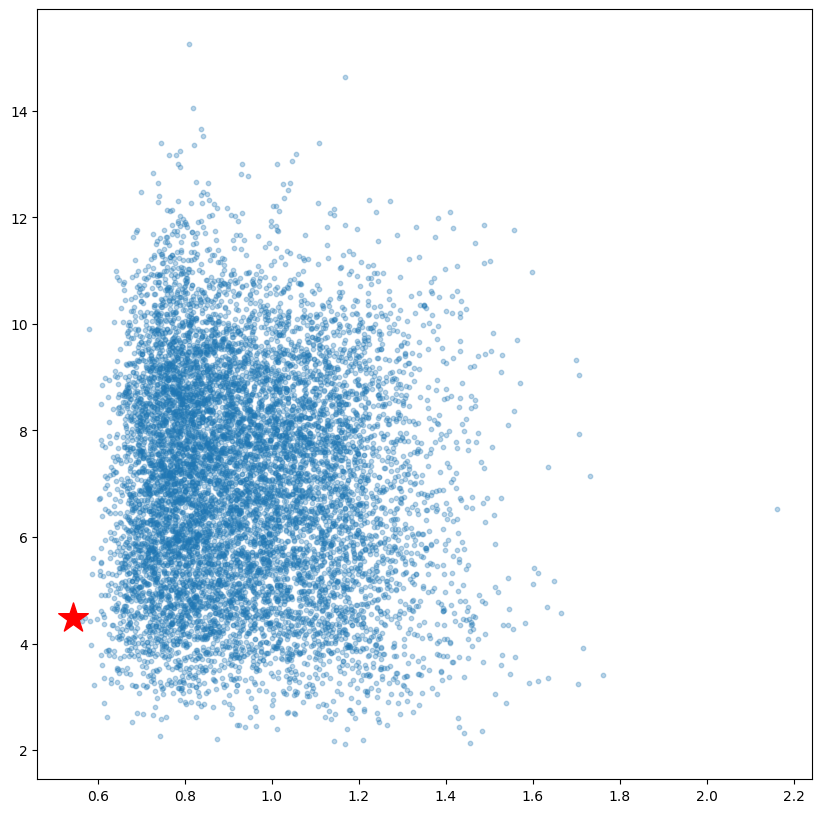

In [23]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

### The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?
This is done by using a parameter called the Sharpe Ratio.

Sharpe Ratio
The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio.

![sharpe formula](image/Sharpe-Ratio-300x149.jpg)





## Part 3: Optimal Risky Portfolio
An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [24]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port.to_csv('optimal_portfolio.csv')
optimal_risky_port


Returns             15.248896
Volatility           0.809300
MATIC-USD weight     0.233083
AVAX-USD weight      0.144547
DOGE-USD weight      0.038493
MIDAS-USD weight     0.107707
BNB-USD weight       0.174969
BTC-USD weight       0.068824
LINK-USD weight      0.060523
UNI-USD weight       0.003618
ADA-USD weight       0.007122
ETH-USD weight       0.031896
TSLA weight          0.026657
NVDA weight          0.046839
AAVE-USD weight      0.055723
Name: 110, dtype: float64

In [25]:
# sort the assets by their weights in the optimal portfolio in deceasing order
sorted_weights = optimal_risky_port.drop(['Returns', 'Volatility']).sort_values(ascending=False)

In [26]:
# Show dollar amount to invest in each asset based on capital available
#sorted_weights.multiply(capital, '$, .2f')

In [27]:
# add the $ symbol to the weights
dollarAllocations = sorted_weights.apply(lambda x: '$' + str(round(x*capital,2)))
dollarAllocations


MATIC-USD weight    $2330.83
BNB-USD weight      $1749.69
AVAX-USD weight     $1445.47
MIDAS-USD weight    $1077.07
BTC-USD weight       $688.24
LINK-USD weight      $605.23
AAVE-USD weight      $557.23
NVDA weight          $468.39
DOGE-USD weight      $384.93
ETH-USD weight       $318.96
TSLA weight          $266.57
ADA-USD weight        $71.22
UNI-USD weight        $36.18
Name: 110, dtype: object

In [28]:
# # Create a dataframe with the weights of each asset multiplied by the adjusted closing price of the asset over the last 5 years
# asset_value = pd.DataFrame() # Create an empty dataframe
# for asset in sorted_weights.index:
#     asset_value[asset] = df[asset]*sorted_weights[asset]
# asset_value.head()
# test test test 




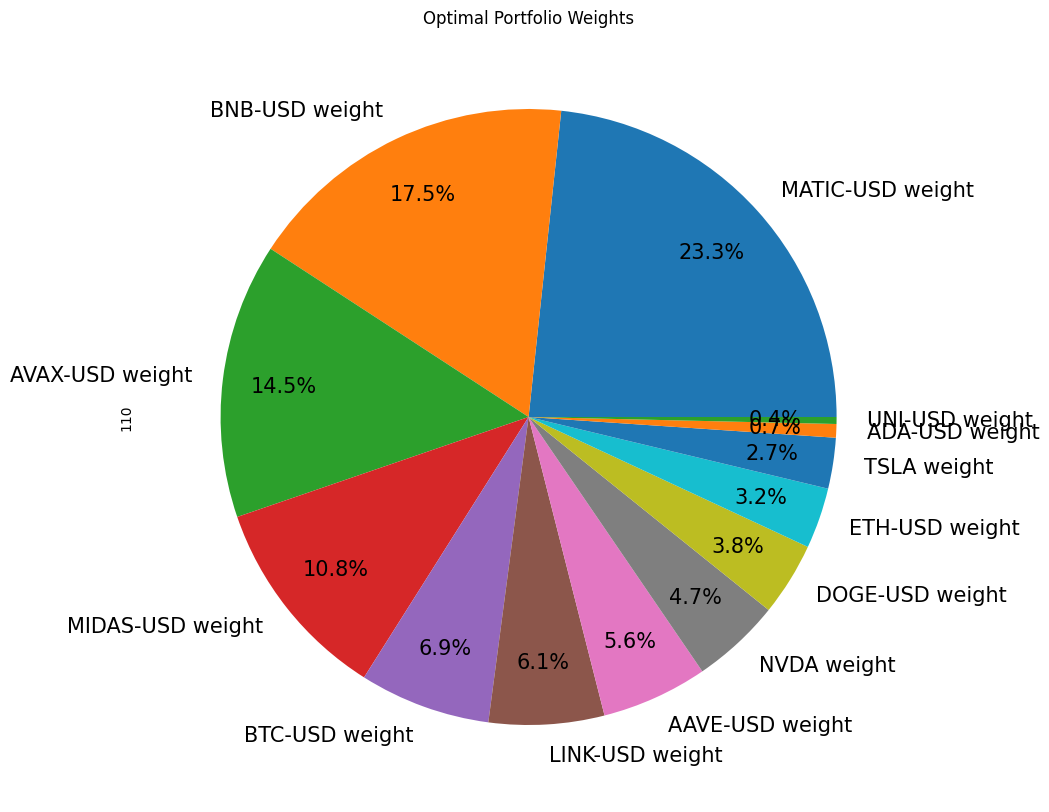

In [29]:
# Create a pie chart of the weights of the assets in the optimal portfolio
plt.sorted_weights = sorted_weights.plot.pie(figsize=[10,10], title='Optimal Portfolio Weights', fontsize=15, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)

In [30]:
# Create a for loop to determine the optimal number of assets to include in the portfolio
# This will be done by creating a list of the number of assets to include in the portfolio
# and then creating a for loop that will run through the list and create a portfolio for each number of assets
# in the list. The portfolio with the highest return will be selected as the optimal portfolio.


# Create a list of the number of assets to include in the portfolio
# num_assets_list = []
# for i in range(1, len(tickers)+1):
#     num_assets_list.append(i)
# print(num_assets_list)


You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

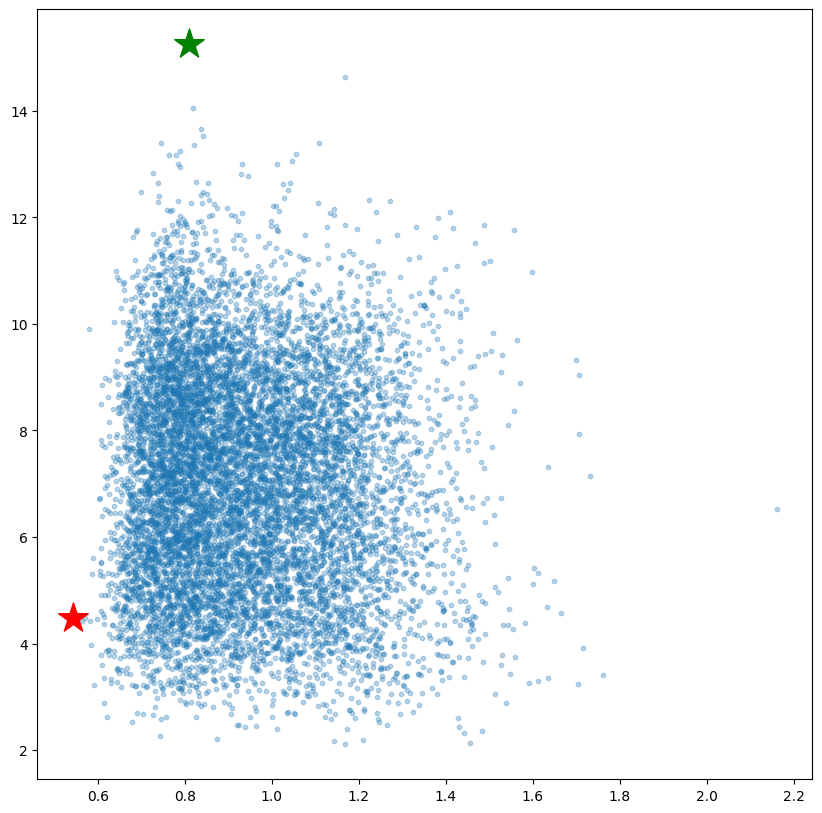

In [31]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

References
- Video series by Finquest (https://www.youtube.com/watch?v=Mb4H3MaJnl8&list=PLLVfjXL2pnkQQXmBMPu_NIst57AKak5Z1)
- Investopedia (https://www.investopedia.com/terms/p/portfoliomanagement.asp)